# Team Project 1
## Langdon Hatton & Leighann Robinson 
### DS-160 SP23

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('titles.csv')
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

#### Before working with the dataset, there are some values needing to be cleaned up and made non-null.

In [4]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [5]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

title null rate: 0.02%
description null rate: 0.31%
age_certification null rate: 44.77%
seasons null rate: 64.0%
imdb_id null rate: 6.89%
imdb_score null rate: 8.24%
imdb_votes null rate: 8.51%
tmdb_popularity null rate: 1.56%
tmdb_score null rate: 5.32%


##### After finding the null rates for variables with null values, those with large percenatges are cleaned up. For age_certification, missing values are replaced with the mode certification. For seasons, imdb_scores, and imdb_votes, any null values are replace with "No Data." For runtime, null values were replaced with the mean value.

In [6]:
df['age_certification'] = df['age_certification'].fillna(df['age_certification'].mode()[0])
df['seasons'].replace(np.nan, 'No Data',inplace  = True)
df['imdb_score'].replace(np.nan, 'No Data',inplace  = True)
df['imdb_votes'].replace(np.nan, 'No Data',inplace  = True)
df['runtime']=df['runtime'].fillna(df['runtime'].mean())

In [7]:
df.sample(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5841,tm985215,Princess 'Daya'Reese,MOVIE,Reese is a con artist from Manila who dreams o...,2021,TV-MA,115,"['comedy', 'romance']",['PH'],No Data,tt13399802,7.1,50.0,1.383,NaN
3057,tm510203,A Call to Spy,MOVIE,"In the beginning of WWII, with Britain becomin...",2019,PG-13,123,"['crime', 'drama', 'thriller', 'war', 'history']",['US'],No Data,tt7698468,6.6,7091.0,11.780,6.8
2239,ts85967,Bumping Mics with Jeff Ross & Dave Attell,SHOW,"When Jeff Ross and Dave Attell take the stage,...",2018,TV-MA,36,['comedy'],['US'],1.0,tt9203078,7.7,1167.0,1.360,7.8
4380,tm405637,122,MOVIE,"During a bloody night, a young man and his lov...",2019,R,95,"['horror', 'thriller']",['EG'],No Data,tt7867670,6.0,5563.0,3.717,6.0
718,ts39093,EastSiders,SHOW,What happens after the world ends? This show ...,2012,TV-MA,23,"['comedy', 'drama']",['US'],4.0,tt2558816,6.8,2783.0,5.685,6.9
3945,ts90640,The Writer,SHOW,When accused of a murder eerily parallel to a ...,2019,TV-14,37,"['drama', 'crime']",['LB'],1.0,tt10312958,8.2,32.0,1.771,10.0
4941,ts279892,Ginny & Georgia,SHOW,Angsty and awkward fifteen year old Ginny Mill...,2021,TV-14,54,"['drama', 'comedy']",['US'],1.0,tt10813940,7.4,46343.0,71.270,8.1
2616,tm323195,Sarah Silverman: A Speck of Dust,MOVIE,"In her first comedy special post-health scare,...",2017,TV-MA,71,"['comedy', 'documentation']",['US'],No Data,tt6948354,6.9,3744.0,5.289,6.9
3541,tm855535,The Hater,MOVIE,A duplicitous young man finds success in the d...,2020,TV-MA,135,"['drama', 'thriller', 'european']",['PL'],No Data,NaN,No Data,No Data,12.908,6.9
2459,tm313424,Pad Man,MOVIE,Upon realizing the extent to which women are a...,2018,PG-13,140,"['drama', 'comedy']",['IN'],No Data,tt7218518,7.9,25539.0,5.173,7.5


### Matplotlib Exploration 

In [8]:
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['seasons'] = pd.to_numeric(df['seasons'], errors='coerce')
df['imdb_score'] = pd.to_numeric(df['imdb_score'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'].replace('[^0-9\.]', '', regex=True), errors='coerce')
df['seasons'] = pd.to_numeric(df['seasons'].replace('[^0-9\.]', '', regex=True), errors='coerce')
df['imdb_score'] = pd.to_numeric(df['imdb_score'].replace('[^0-9\.]', '', regex=True), errors='coerce')
df.dropna(subset=['runtime', 'seasons'], inplace=True)

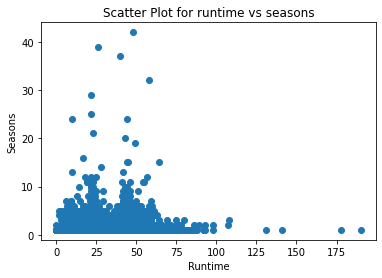

In [9]:
#scatter plot for runtime vs seasons
plt.scatter(df['runtime'], df['seasons'])
plt.xlabel('Runtime')
plt.ylabel('Seasons')
plt.title('Scatter Plot for runtime vs seasons')
plt.show()

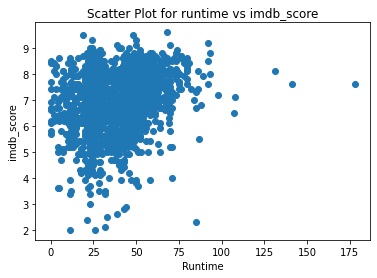

In [10]:
#scatter plot for runtime vs imdb_score
plt.scatter(df['runtime'], df['imdb_score'])
plt.xlabel('Runtime')
plt.ylabel('imdb_score')
plt.title('Scatter Plot for runtime vs imdb_score')
plt.show()

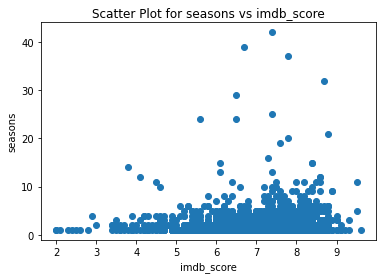

In [11]:
#scatter plot for seasons vs imdb score
plt.scatter(df['imdb_score'], df['seasons'])
plt.xlabel('imdb_score')
plt.ylabel('seasons')
plt.title('Scatter Plot for seasons vs imdb_score')
plt.show()

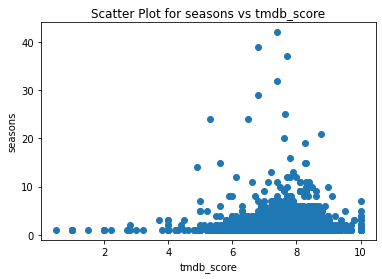

In [12]:
#scatter plot for seasons vs tmdb score
plt.scatter(df['tmdb_score'], df['seasons'])
plt.xlabel('tmdb_score')
plt.ylabel('seasons')
plt.title('Scatter Plot for seasons vs tmdb_score')
plt.show()

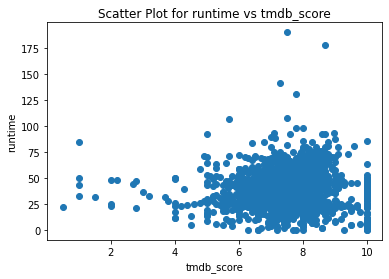

In [13]:
#scatter plot for seasons vs tmdb score
plt.scatter(df['tmdb_score'],df['runtime'])
plt.xlabel('tmdb_score')
plt.ylabel('runtime')
plt.title('Scatter Plot for runtime vs tmdb_score')
plt.show()

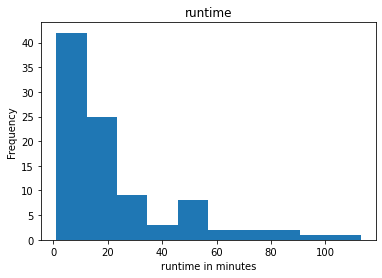

In [14]:
#histogram for runtime
hist=df['runtime'].value_counts()
hist.plot(kind='hist')
plt.title('runtime')
plt.xlabel('runtime in minutes')
plt.show()

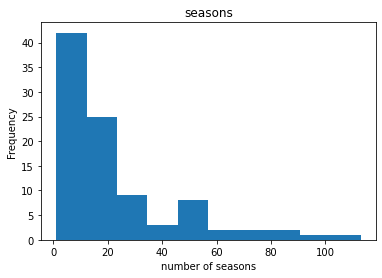

In [15]:
#histogram for seasons
hist2=df['seasons'].value_counts()
hist.plot(kind='hist')
plt.title('seasons')
plt.xlabel('number of seasons')
plt.show()

### Pandas Exploration 

In [16]:
new_df= df.copy()
new_df = new_df[new_df['imdb_votes'] != 'No Data'].copy()
new_df['imdb_votes'] = new_df['imdb_votes'].astype(float)
new_df = new_df[new_df['imdb_score'] != 'No Data']
new_df['imdb_score'] = new_df['imdb_score'].astype(float)

In [17]:
new_df.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,1939.000000,1939.000000,1939.000000,1939.000000,1.939000e+03,1914.000000,1860.000000
mean,2017.332646,38.765859,2.232078,6.977927,1.733155e+04,27.970410,7.472083
std,5.179166,17.207135,2.769952,1.077401,7.208902e+04,90.343132,1.067492
min,1969.000000,0.000000,1.000000,2.000000,5.000000e+00,0.600000,1.000000
25%,2016.000000,25.000000,1.000000,6.400000,4.580000e+02,3.580000,6.900000
50%,2019.000000,41.000000,1.000000,7.100000,1.766000e+03,8.716500,7.500000
75%,2020.000000,49.000000,2.500000,7.700000,7.203500e+03,21.132750,8.100000
max,2022.000000,178.000000,42.000000,9.600000,1.775990e+06,2226.231000,10.000000


In [18]:
#table for categorical variables age_certification and type
object_cols = ['age_certification','type']
df_subset = df[object_cols]
for col in df_subset:
    freq_count = df[col].value_counts()
    prop_percent = freq_count / len(df) * 100
    
  
    table = pd.DataFrame({
        'Category': freq_count.index,
        'Frequency': freq_count.values,
        'Proportion (%)': prop_percent.values.round(2)})
    
    print(f"Table 3: Proportions for {col} (n={len(df)})\n")
    print(table.to_string(index=False))
    print('\n')

Table 3: Proportions for age_certification (n=2106)

Category  Frequency  Proportion (%)
   TV-MA       1138           54.04
   TV-14        474           22.51
   TV-PG        188            8.93
   TV-Y7        120            5.70
    TV-Y        107            5.08
    TV-G         79            3.75


Table 3: Proportions for type (n=2106)

Category  Frequency  Proportion (%)
    SHOW       2106           100.0




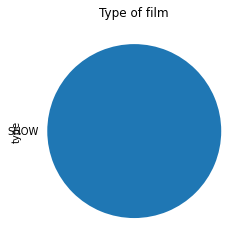

In [19]:
#pie plot for type
pie=df['type'].value_counts()
pie.plot(kind='pie')
plt.title('Type of film')
plt.show()

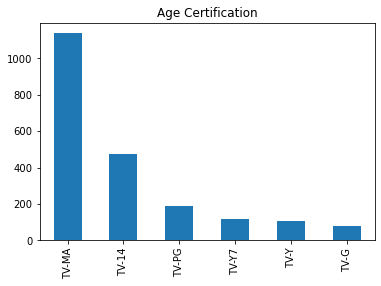

In [20]:
#bar plot for age_certification 
bar=df['age_certification'].value_counts()
bar.plot(kind='bar')
plt.title('Age Certification')
plt.show()

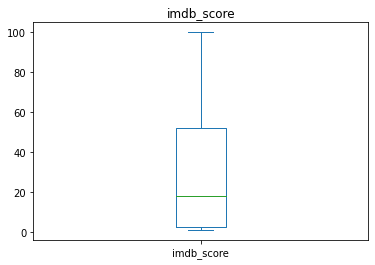

In [21]:
#boxplot for imdb_score
box=df['imdb_score'].value_counts()
box.plot(kind='box')
plt.title('imdb_score')
plt.show()

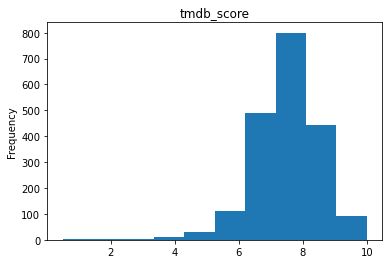

In [22]:
#histogram for tmdb_score
bar=df['tmdb_score']
bar.plot(kind='hist')
plt.title('tmdb_score')
plt.show()

### Seaborn Exploration 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2106 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2106 non-null   object 
 1   title                 2106 non-null   object 
 2   type                  2106 non-null   object 
 3   description           2097 non-null   object 
 4   release_year          2106 non-null   int64  
 5   age_certification     2106 non-null   object 
 6   runtime               2106 non-null   int64  
 7   genres                2106 non-null   object 
 8   production_countries  2106 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               1965 non-null   object 
 11  imdb_score            1939 non-null   float64
 12  imdb_votes            2106 non-null   object 
 13  tmdb_popularity       2077 non-null   float64
 14  tmdb_score            1990 non-null   float64
dtypes: float64(4), int64(

In [24]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

###### Linechart of release dates and number of movies and shows found on Netflix corresponding

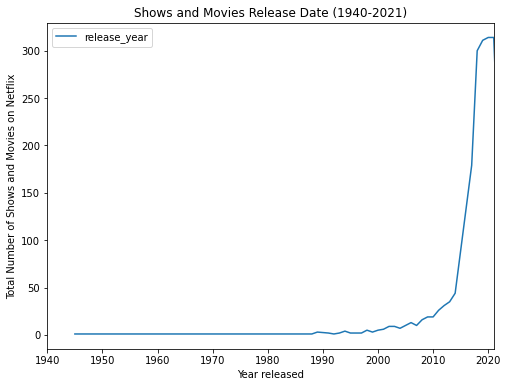

In [25]:
release_year_count=df['release_year'].value_counts()
release_year_count=pd.DataFrame(release_year_count)

plt.figure(figsize=(8, 6))
sns.lineplot(data=release_year_count)
plt.title('Shows and Movies Release Date (1940-2021)')
plt.xlim(1940, 2021) # set x axis limit to the years of release
plt.xlabel('Year released')
plt.ylabel('Total Number of Shows and Movies on Netflix')
plt.show()

##### Heatmap showing Pearson correlation between variables 

In [26]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

                 release_year   runtime  tmdb_popularity  tmdb_score
release_year         1.000000  0.117031        -0.042539   -0.035931
runtime              0.117031  1.000000         0.067920    0.007998
tmdb_popularity     -0.042539  0.067920         1.000000    0.089928
tmdb_score          -0.035931  0.007998         0.089928    1.000000


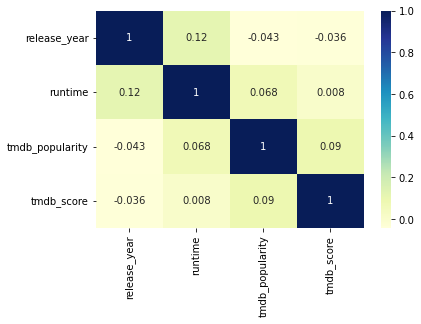

In [27]:
heat_map_corr=df[['release_year','runtime','tmdb_popularity','tmdb_score']].corr(method='pearson')
print(heat_map_corr)

cols=['release_year','runtime','tmdb_popularity','tmdb_score']
heat_map=sns.heatmap(heat_map_corr, annot=True,
                    xticklabels=cols,
                    yticklabels=cols,
                    cmap='YlGnBu')




##### Running pairplot on all of the dataframe

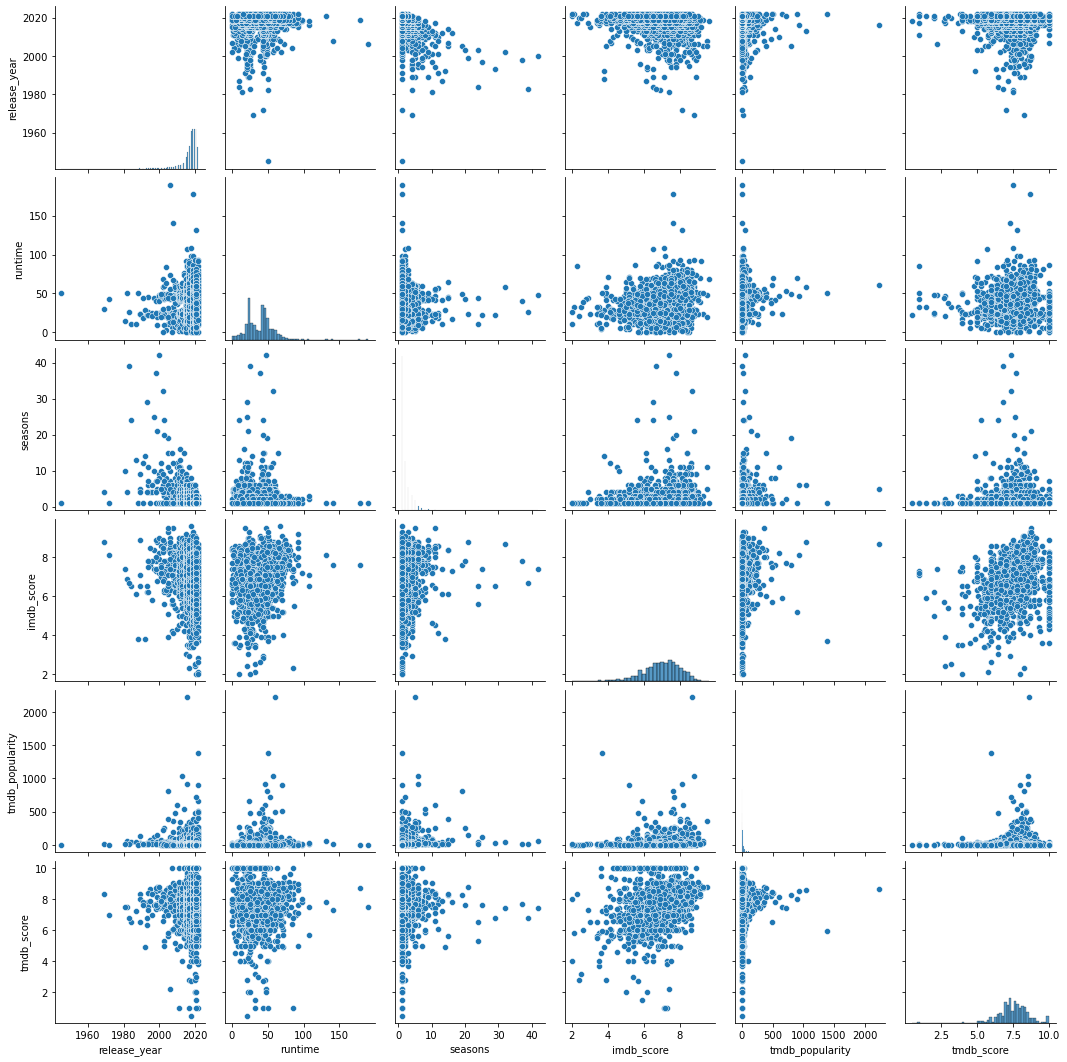

In [28]:
pairplot=sns.pairplot(df)

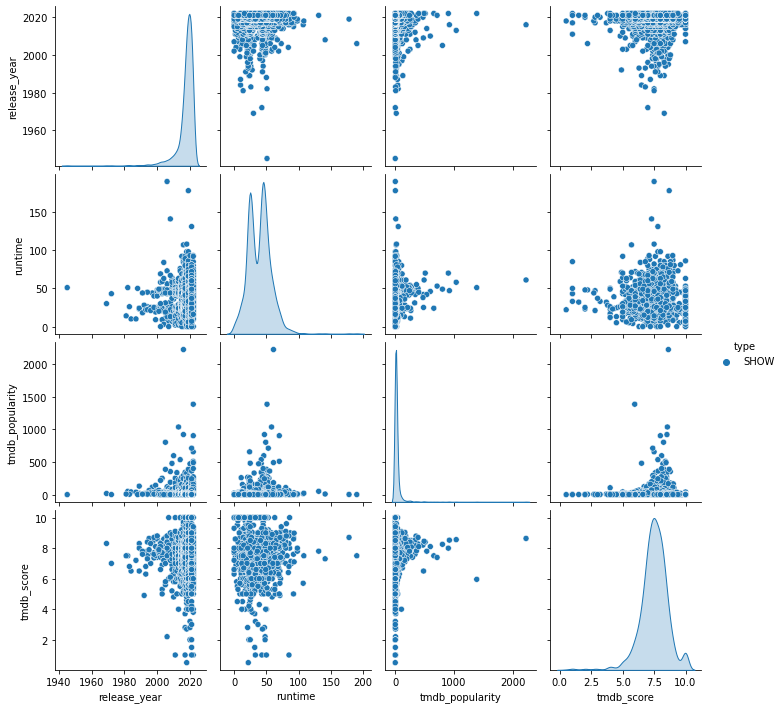

In [29]:
# adding hue
pair_plot=sns.pairplot(df[['release_year','runtime','tmdb_popularity','tmdb_score', 'type']], hue='type')

#### Further investigating relatinship between variables

In [30]:
df.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

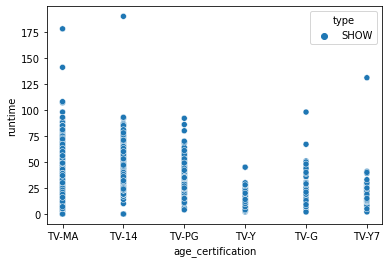

In [31]:
# scatterplot Runtime vs age_certfication, by type
scatterplot=sns.scatterplot(x='age_certification',
                           y='runtime',
                           data=df,
                           hue='type')

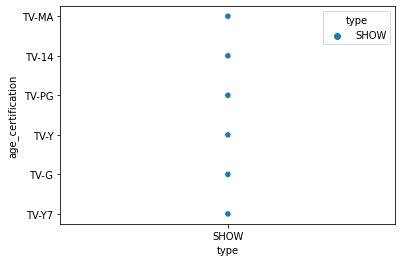

In [32]:
# scatterplot age_certification by type
scatterplot=sns.scatterplot(y='age_certification',
                           x='type',
                           data=df,
                           hue='type')

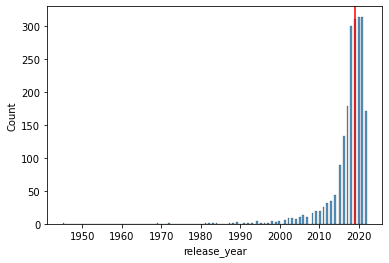

In [33]:
# histogram showing count of title per release year and median year
hist=sns.histplot(x='release_year', data=df)
median=df['release_year'].median()

plt.axvline(median, color='red')
plt.show()

### Tableau Exploration 

#### In the screenshots below, 4 graphs and the collective dashboard for our Tableau exploration can be found with further explanation of each figure below its corresponding graph

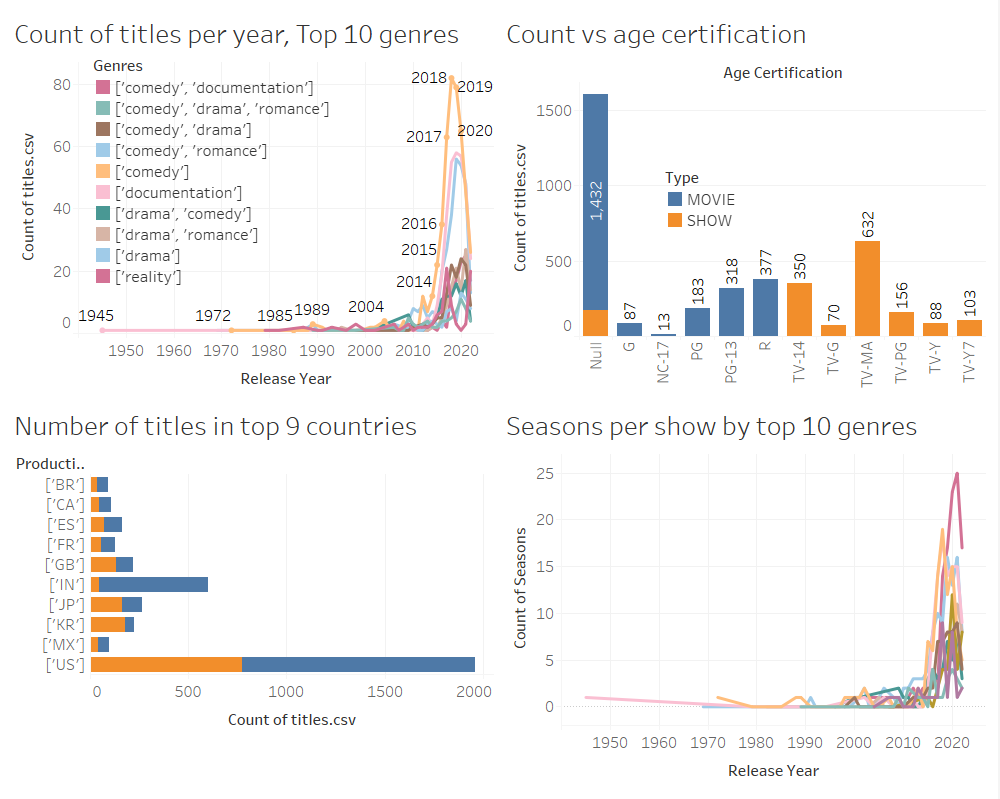

##### Above is a screenshot of the collective dashboard from our exploration

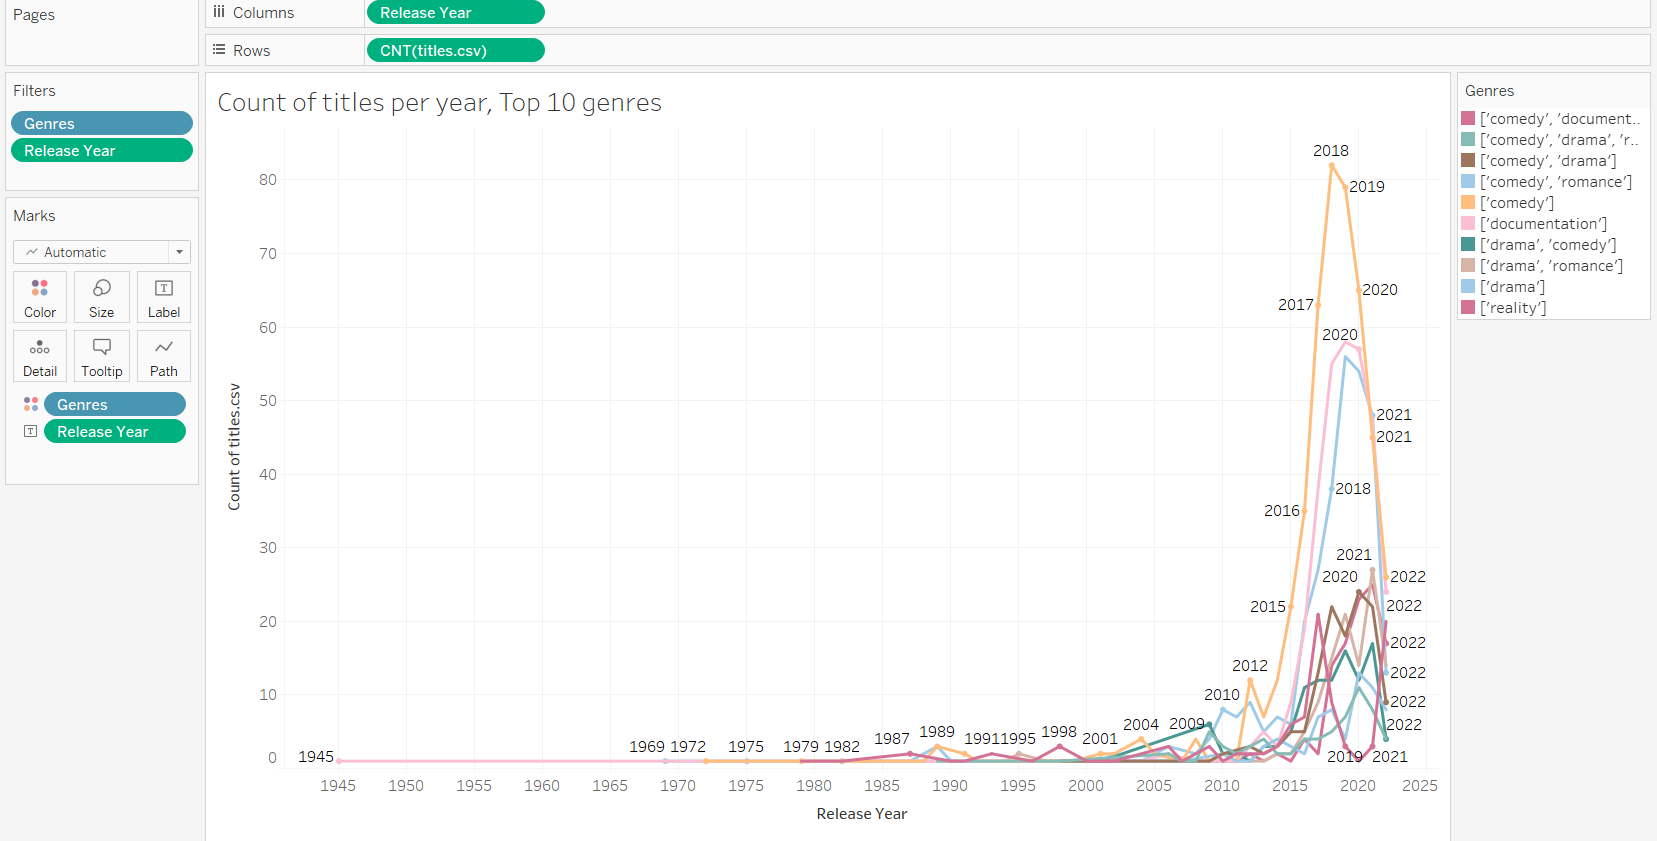

##### The figure above depicts the number of titles released every year from 1940 until 2022, color coordinated by the top 10 genres of the titles available on Netflix.

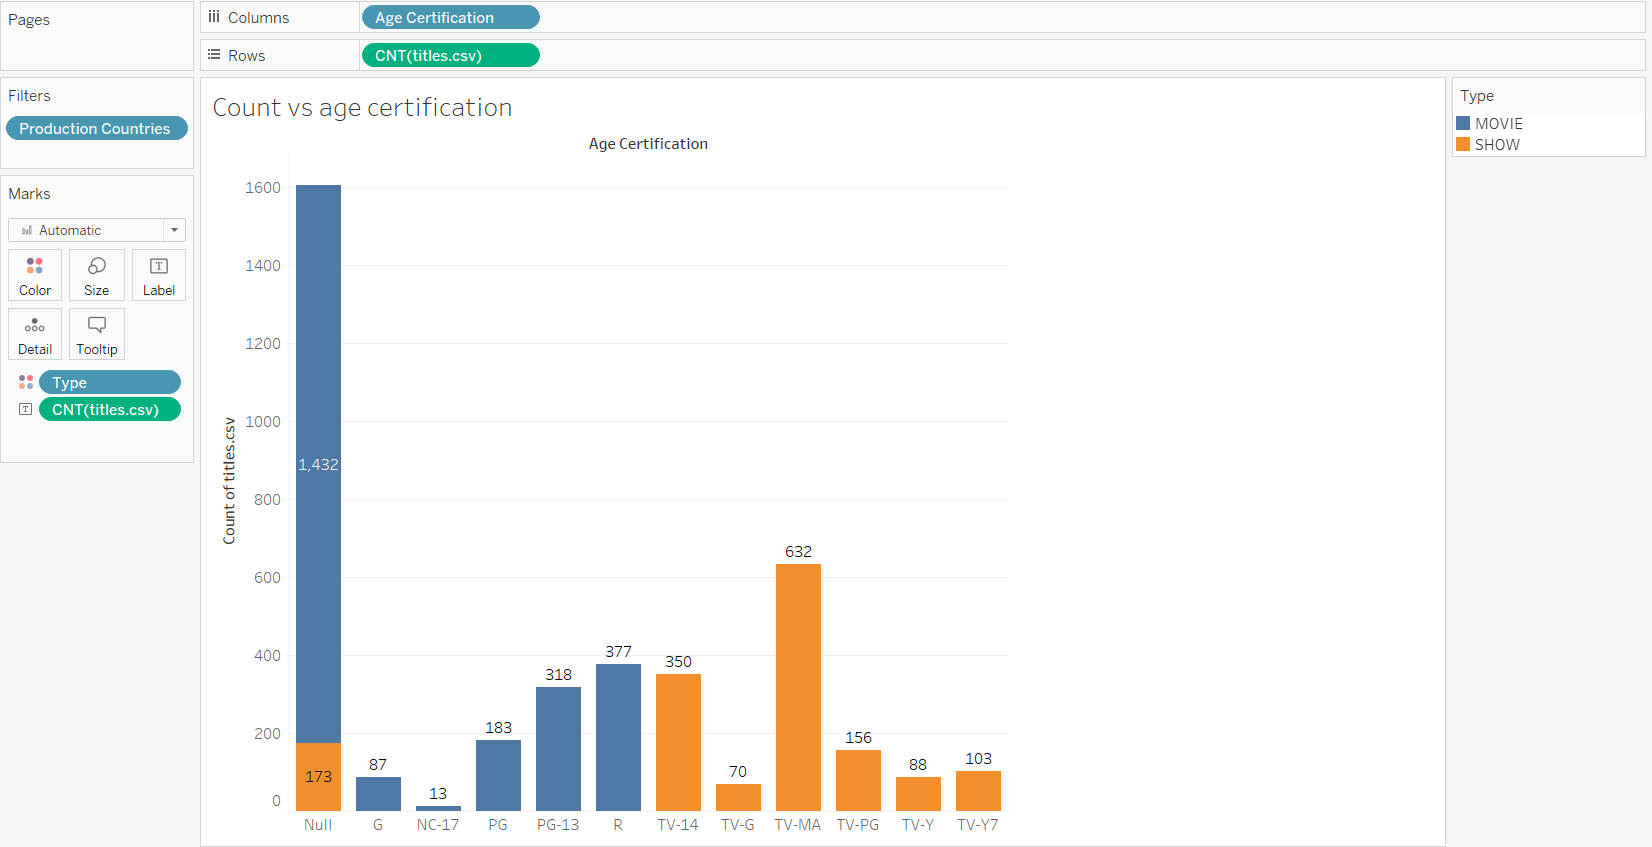

##### Shown above is a bar chart of the number of titles per age certification, further distinguished into movies or shows.

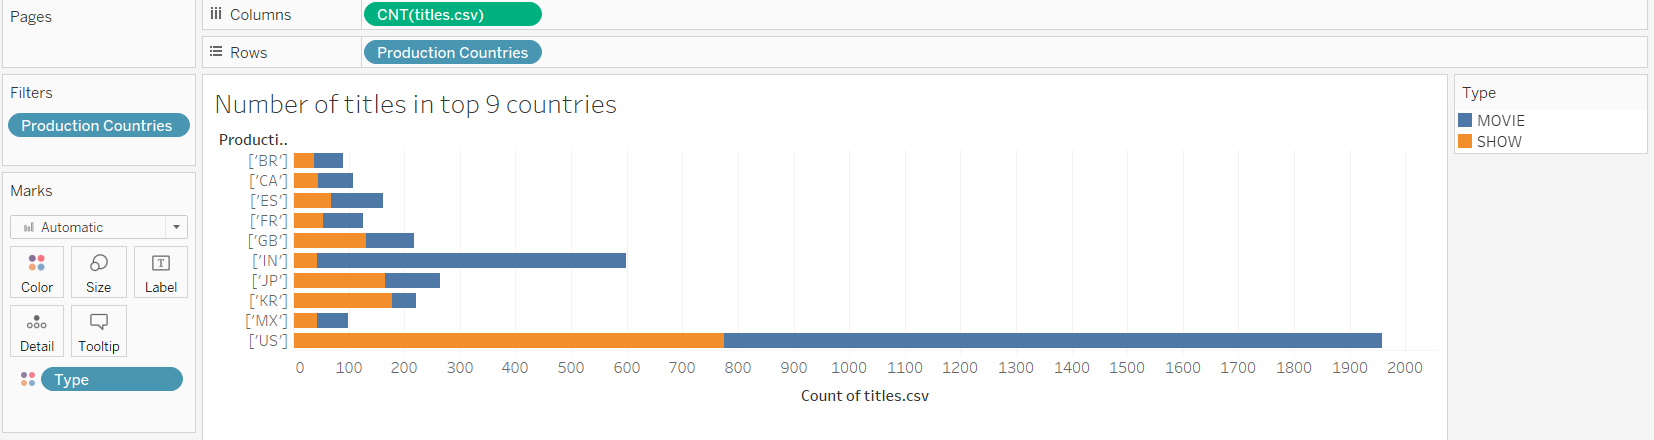

##### The horizontal bar chart above depicts the number of titles from the top 9 production companies for both movies and tv shows.

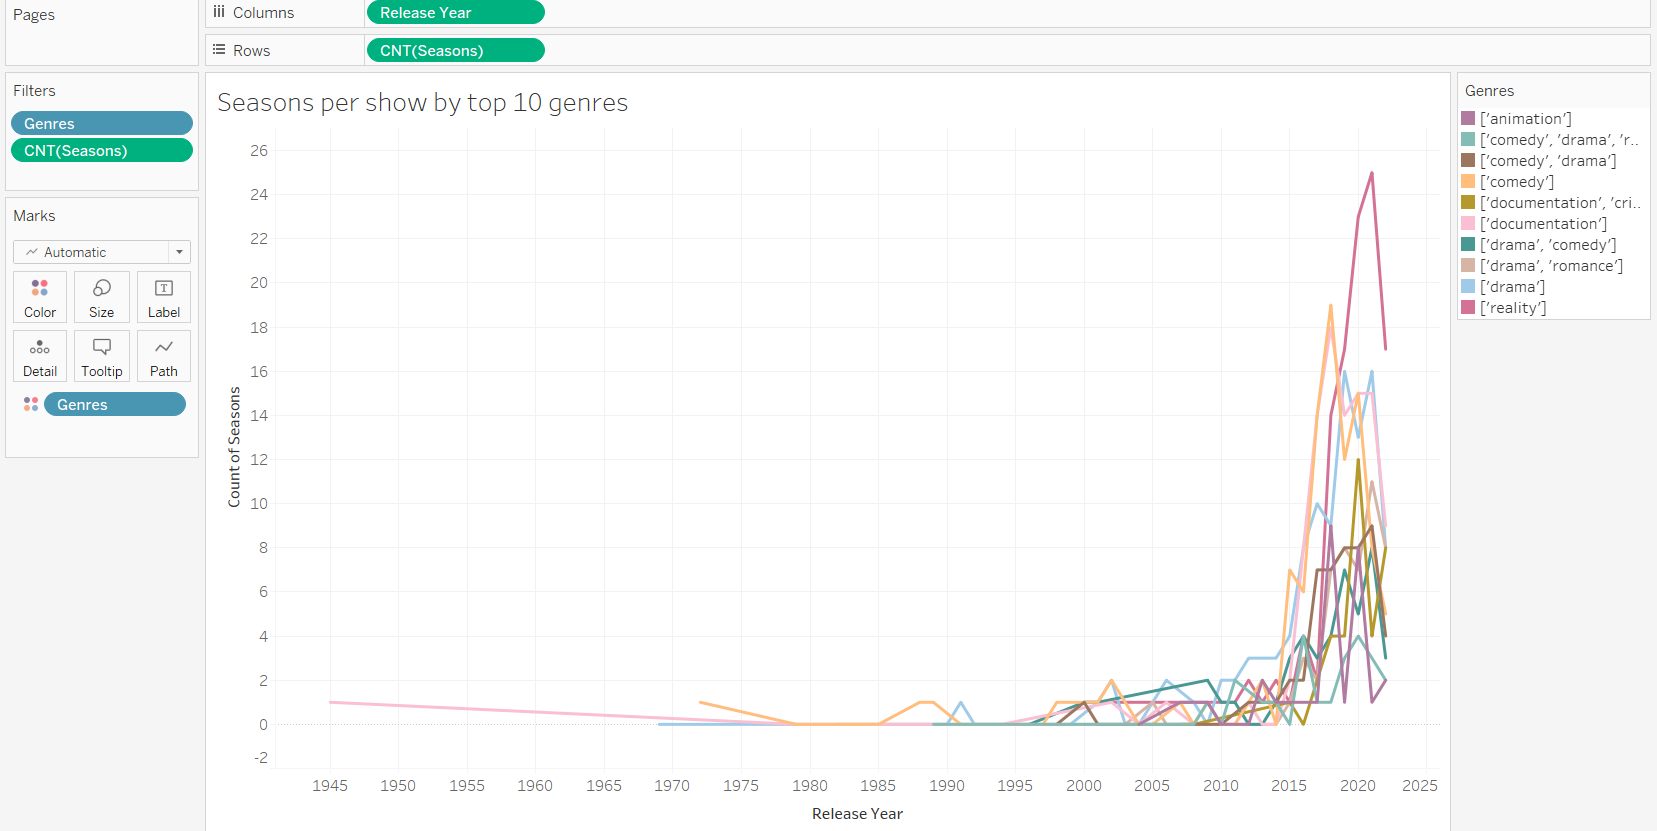

##### Lastly, above shows the number of seasons per show versus the year the show was released. Again, this is further broken down into color coordinating trends with the top 10 genres of titles on Netflix overall.